In [2]:
#imports

import pandas as pd

import numpy as np

import datetime
import seaborn as sns

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [25]:
# import data

earthquakes = pd.read_csv("/home/nbuser/library/earthquakes.csv")

volcanos = pd.read_csv("/home/nbuser/library/volcanos.csv")

landslides = pd.read_csv("/home/nbuser/library/landslides.csv")

In [6]:
# set random seed

np.random.seed(0);

In [20]:
#sample dates column of landslides dataset
landslides["date"].sample(10)

585     2/14/11
223     11/8/09
456     9/28/10
1244     6/1/14
1302    6/11/09
595      3/6/11
1122    9/12/13
610     3/11/11
1692     3/2/16
1056    7/18/13
Name: date, dtype: object

In [15]:
landslides['date'].dtype

dtype('O')

In [44]:
# exercise asks to check Dat column in earthquakes dataset but as that colum could not be found, we will check for volcanos

print(volcanos["Date"].sample(10))

print("-----------------")

print("Object Type is:", volcanos["Date"].dtype)

9943     04/21/1990
5558     06/16/1980
3817     02/03/1976
8370     02/14/1987
17184    01/08/2005
5894     06/13/1981
7617     07/18/1985
11009    07/18/1992
9439     04/25/1989
14746    02/28/2000
Name: Date, dtype: object
-----------------
Object Type is: object


In [51]:
landslides['date_parsed'] = pd.to_datetime(landslides["date"], format = "%m/%d/%y")


In [53]:
# check now the dtype of date_parsed

landslides["date_parsed"].sample(10)

#landslides['date_parsed'].dtype

277    2010-03-14
1535   2015-07-14
998    2013-06-26
609    2011-03-11
1375   2014-01-05
1116   2013-09-08
117    2008-07-16
1182   2013-12-11
404    2010-08-06
704    2011-05-11
Name: date_parsed, dtype: datetime64[ns]

In [56]:
#Exercise: Create date_parsed for volcanos

volcanos['date_parsed'] = pd.to_datetime(volcanos['Date'], format = "%m/%d/%y" )


#Note this throws error as some dates have time zone appended to them. Example :1975-02-23T02:58:41.000Z

ValueError: unconverted data remains: 65

In [62]:
# lets use flag errors = corce to handle such recrds
volcanos['date_parsed'] = pd.to_datetime(volcanos['Date'], format = "%m/%d/%y",  errors='coerce' )



In [65]:
volcanos["date_parsed"].head(10)

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
5   NaT
6   NaT
7   NaT
8   NaT
9   NaT
Name: date_parsed, dtype: datetime64[ns]

In [69]:
#However, this means that any input that cannot be successfully concerted to the above format will be outputted as NaT. 
#Cheking pandas documentation, we see that there is infer_datetime which can automatically infer the format of datetime strings.
volcanos["date_parsed2"] = pd.to_datetime(volcanos["Date"], infer_datetime_format = True)

In [75]:
#Notice this has successfully converted all string to dates.

print (volcanos['date_parsed2'].size);

print (volcanos['date_parsed2'].dtype)

volcanos['date_parsed2'].sample(20)

23412
datetime64[ns]


1758    1970-11-26
15875   2002-06-25
11062   1992-08-18
3575    1975-08-06
10891   1992-05-15
10467   1991-05-04
12242   1994-12-29
11201   1992-11-12
17995   2006-08-12
22176   2014-04-19
2021    1971-07-27
8524    1987-05-30
2189    1972-01-03
7155    1984-08-27
1775    1970-12-06
12491   1995-05-30
18101   2006-11-11
19675   2009-10-01
21649   2013-02-20
13976   1998-05-11
Name: date_parsed2, dtype: datetime64[ns]

In [72]:
volcanos['Date'].size

23412

In [77]:
#get day

day_of_month_landslides = landslides['date_parsed'].dt.day

In [78]:
day_of_month_volcanos = volcanos['date_parsed2'].dt.day

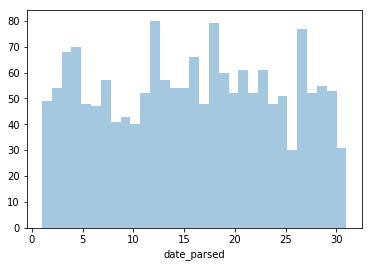

In [79]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

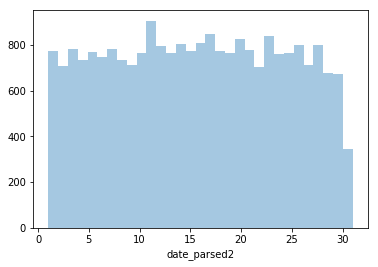

In [81]:
# remove na's
day_of_month_volcanos = day_of_month_volcanos.dropna()

# plot the day of the month
sns.distplot(day_of_month_volcanos, kde=False, bins=31)